In [1]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [2]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu
from suite3d import file_utils as flu

In [22]:
job_params = {    
    'planes' :         n.arange(5,10),
    'n_ch_tif' : 15,
    'n_init_files' :   1,
    'fuse_shift_override' : 6,
    'subtract_crosstalk' : False,
    'fix_fastZ' : 556,
}

In [23]:
# Locate the experiment files 

subjects_dir =   '/mnt/zortex-subjects/'
expt_info = { 
    'subject':         'AH010',
    'date' :          '2024-01-17',
    'expnum' :         [1],}

In [24]:

tifs, si_params, exp_str = flu.find_exp(subjects_dir, **expt_info, verbose=True, get_si_params=True)
job_params['fs'] = si_params['vol_rate']

Looking for AH010/2024-01-17/1 in /mnt/zortex-subjects/
Found


In [25]:
# Create the job
job = Job('/mnt/md0/runs/','dev-test-1um', tifs = tifs,
          params=job_params, create=True, overwrite=True, verbosity = 3)

Job directory /mnt/md0/runs/s3d-dev-test-1um already exists
Loading job directory for dev-test-1um in /mnt/md0/runs/
   Loading dirs 
      Found dir registered_fused_data
      Found dir summary
      Found dir iters
   Loading default params
      Updating param planes
      Updating param n_ch_tif
      Updating param n_init_files
      Updating param fuse_shift_override
      Updating param subtract_crosstalk
      Updating param fix_fastZ
      Updating param fs
   Updated main params file


   Saved a copy of params at /mnt/md0/runs/s3d-dev-test-1um/summary
   Updated main params file
Launching initial pass
Saving summary to /mnt/md0/runs/s3d-dev-test-1um/summary/summary.npy
   Loading init tifs with 15 channels
Loading /mnt/zortex-subjects/AH010/2024-01-17/1/mm2_1umpix_laser60p_of_470mw_00001_00006.tif
Loaded 1 files, total 0.94 GB
   Loaded init tifs
   Loaded movie with 100 frames and shape 5, 1001, 1009
         Enforcing positivity in mean image
   No crosstalk estimation or subtraction
   Estimating fusing shifts
      Overriding
   Using best fuse shift of 6
   Building ops file
   Saved init mov to /mnt/md0/runs/s3d-dev-test-1um/summary/init_mov.npy
   Aligning planes
float64
8
      Fixing 0 plane alignment outliers
   Fusing and padding init mov
Setting smooth_sigma: 1.15
Setting maxregshift: 0.15
Setting Ly: 1030
Setting Lx: 990
Setting nonrigid: True
   Computing reference images
        Computed reference for plane 0
        Computed reference for plane 1
   

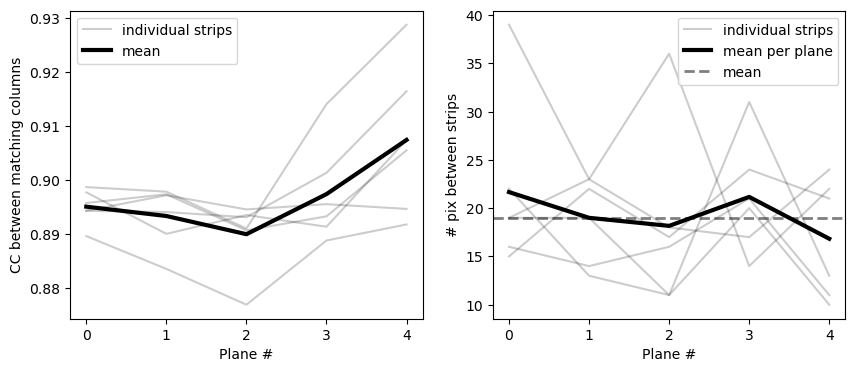

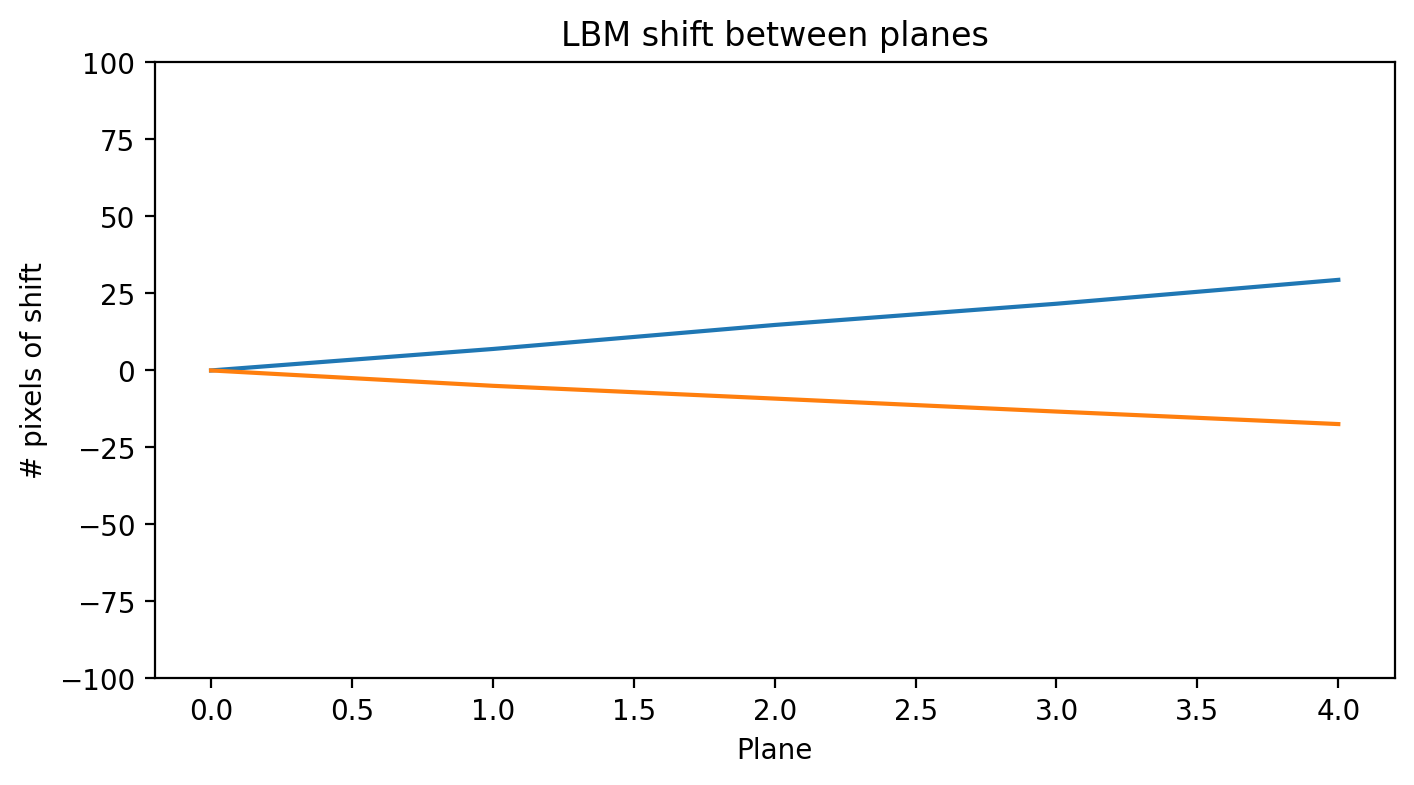

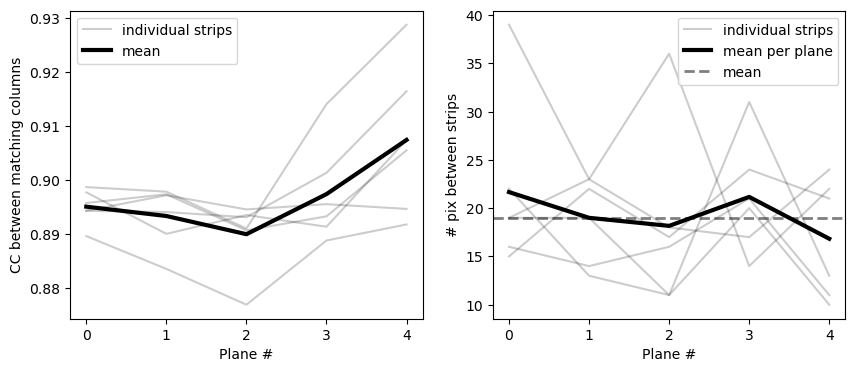

In [26]:
# %%time
summary = job.run_init_pass()

In [28]:
summary = job.load_summary()

In [29]:
summary.keys()

dict_keys(['ref_img_3d', 'ref_img_3d_unaligned', 'raw_img', 'img', 'img_pad', 'crosstalk_coeff', 'plane_shifts', 'refs_and_masks', 'all_ops', 'min_pix_vals', 'fuse_shifts', 'fuse_shift', 'fuse_ccs', 'tiffile_xs', 'xpad', 'ypad', 'new_xs', 'og_xs'])

In [33]:
job.dirs['summary']

'/mnt/md0/runs/s3d-dev-test-1um/summary'

In [30]:
import os 

In [34]:
os.listdir('/mnt/md0/runs/s3d-dev-test-1um/summary')

['params.npy', 'summary.npy', 'init_mov.npy']

In [47]:
import colorcet as cc

In [49]:
from bokeh.models.mappers import LinearColorMapper

In [59]:
ref_vol = summary['ref_img_3d']

In [55]:
cmap = LinearColorMapper(palette = cc.gray, low = 0, high = 1000.0)

In [60]:
p = figure(height = 400, width = 400)

im = p.image(image=[ref_vol[0]], x=0, y=0, dw=10, dh=10, color_mapper=cmap, level="image")
show(p)

In [37]:


# create a complex chart with mouse-over tooltips

from bokeh.palettes import HighContrast3
from bokeh.plotting import figure, show

fruits = ["Apples", "Pears", "Nectarines", "Plums", "Grapes", "Strawberries"]
years = ["2015", "2016", "2017"]

data = {"fruits": fruits, "2015": [2, 1, 4, 3, 2, 4], "2016": [5, 3, 4, 2, 4, 6], "2017": [3, 2, 4, 4, 5, 3]}

p = figure(x_range=fruits, height=250, title="Fruit Counts by Year", toolbar_location=None, tools="hover", tooltips="$name @fruits: @$name")

p.vbar_stack(years, x="fruits", width=0.9, color=HighContrast3, source=data, legend_label=years)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)



In [9]:
import panel as pn
pn.extension()

In [12]:
widget = pn.widgets.TextInput(name='A widget', value='A string')
# widget

In [27]:
widget

[autoreload of docstring_parser.google failed: Traceback (most recent call last):
  File "/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 361, in update_class
    update_instances(old, new)
  File "/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 319, in update_instances
    object.__setattr__(ref, "__class__", new)
TypeError: __class__ assignment: 'Section' object layout differs from 'Sec

BokehModel(combine_events=True, render_bundle={'docs_json': {'c46ff77f-07f3-4dac-8a28-6f2e00d4384e': {'version…

   Saved a copy of params at /mnt/md0/runs/s3d-dev-test-1um/summary
   Updated main params file
Launching initial pass
Saving summary to /mnt/md0/runs/s3d-dev-test-1um/summary/summary.npy
   Loading init tifs with 15 channels
Loading /mnt/zortex-subjects/AH010/2024-01-17/1/mm2_1umpix_laser60p_of_470mw_00001_00003.tif


KeyboardInterrupt: 